## Langkah 1 - Load Data

In [20]:
# Load data
import pandas as pd
data = pd.read_csv('../Dataset/iris.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Langkah 2 - Eksplorasi Data
Cek struktur data informasi deskriptif data

In [21]:
data.info()
data.describe()

# Cek nama kolom yang tersedia
print("\nNama kolom:", data.columns.tolist())

# Jika kolom label adalah 'variety' atau nama lain, gunakan kolom terakhir
label_col = data.columns[-1]
print(f"\nDistribusi label ({label_col}):")
print(data[label_col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Nama kolom: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

Distribusi label (variety):
variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


## Langkah 3 - Visualisasi Data
Lakukan visualisasi data untuk mengetahui distribusi dan korelasi setiap fitur terhadap label.

Text(0.5, 1.0, 'Pairplot dengan label: variety')

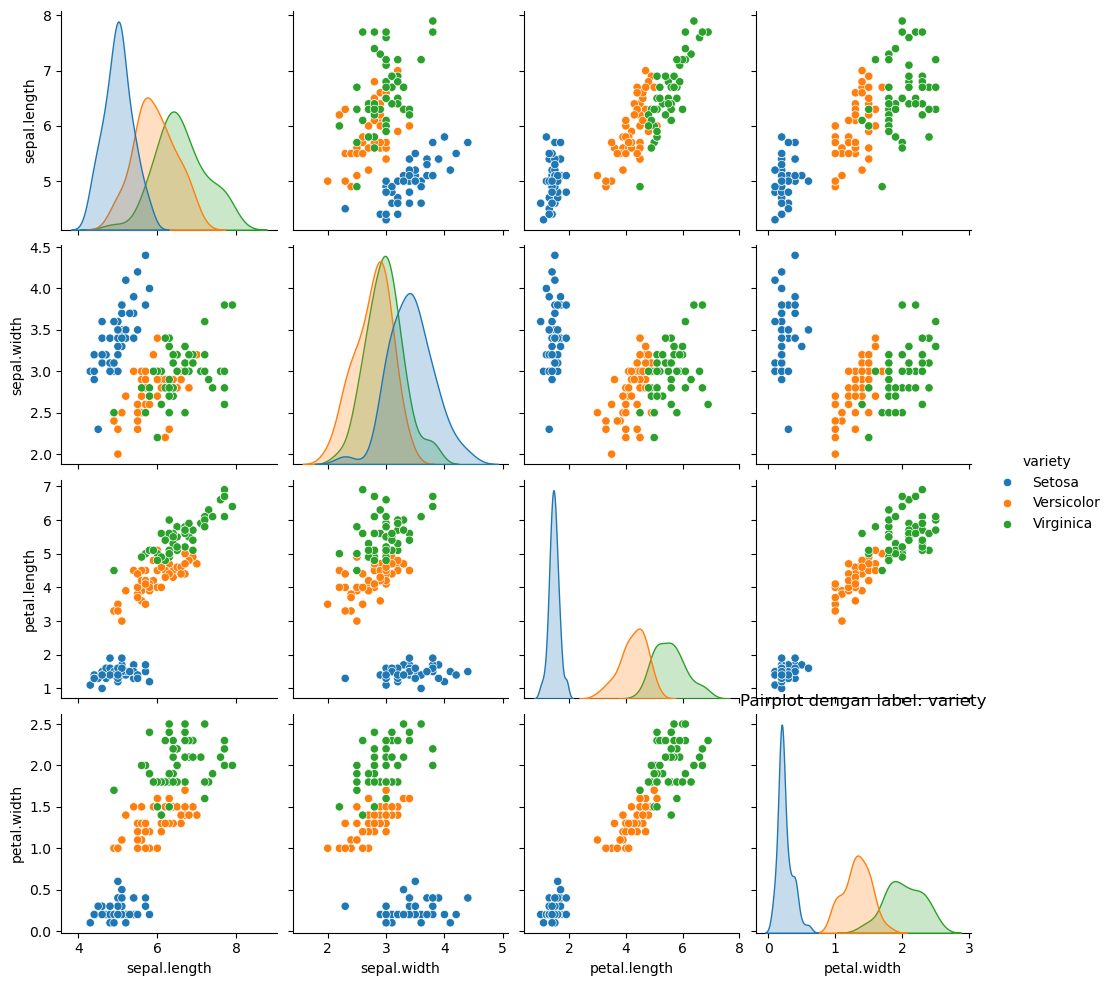

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gunakan kolom terakhir sebagai label (hue)
label_col = data.columns[-1]

sns.pairplot(data, hue=label_col)
plt.title(f'Pairplot dengan label: {label_col}')

## Langkah 4 - Preprocessing
Pada tahap ini, kita akan memisahkan antara label dengan fitur yang akan digunakan. Selain itu, untuk alasan pembelajaran, kita akan melakukan standardisasi dari fitur yang akan digunakan. 

> Pada kasus Iris Dataset, seluruh fitur sudah dalam satuan yang sama yaitu cm.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1]   # semua kolom kecuali label
y = data.iloc[:, -1]    # kolom label terakhir

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Langkah 5 - Buat Model kNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Tentukan nilai K (misalnya 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Latih model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Langkah 6 - Evaluasi Model kNN
Pada tahap ini kita akan melakukan evaluasi terhadap model kNN yang telah dibuat sebelumnya. Metrik utama yang akan digunakan adalah akurasi dan detail analisis menggunakan confusion metrics.

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Di dapatkan hasil:

```
Akurasi: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45
```

Dapat dilihat bahwa model dapat bekerja dengan performa sempurna pada data testing. Namun apakah memang nilai k=3 adalah nilai yang terbaik? Selanjutnya kita akan mengevaluasi setiap nilai k.

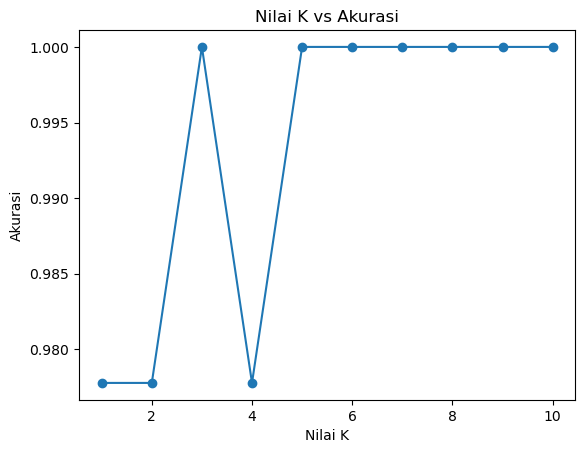

In [30]:
acc = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 11), acc, marker='o')
plt.title('Nilai K vs Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.show()


Dapat dilihat bahwa performa data test mendapatkan nilai sempurna pada k=3 dilanjutkan dengan k=6 hingga k=10. Meskipun demikian, perlu dicatat bahwa kNN tidak pernah menyimpan bobot hasil training, proses klasifikasi dilakukan secara langsung sesuai dengan jumlah tetangga sehingga hasil ini masih perlu dibandingkan dengan hasil data training.